## Project: Analyze COVID-19 Death Percentage Prediction

### Table Of Contents

#### Introduction

#### The COVID-19 dataset provides information on global pandemic statistics, including confirmed cases, deaths, recoveries, and vaccination rates across various countries and regions. This dataset contains data from multiple sources, with thousands of rows and numerous columns capturing the evolution of the pandemic over time.Through this dataset investigation, several packages are used (pandas, numpy, matplotlib) for data manipulation, analysis, and visualization. Specific columns, such as ‘Deaths’, ‘Confirmed’, and ‘Recovered’, represent the impact of the virus at a global scale. Additionally, some columns contain country-specific data, and categorical variables like 'Country/Region' are encoded to help in the analysis.
#### The goal of this project is to predict the death percentage based on features such as total deaths, confirmed cases, recovery rates, and other relevant pandemic metrics. This analysis aims to uncover patterns and trends that could help in forecasting future pandemic outcomes and provide valuable insights for public health strategies.

####  Before the analysis of the dataset, data wrangling phase has been conducted to clean the data from unimportant columns, noisy data, and other problems. Before data wrangling phase, general properities about the dataset has been addressed.

### Analysis of the DataSet (questions that is analyized in the dataset):

#### 1: How have the global daily COVID-19 deaths evolved over time?
#### 2: Which countries/regions have the highest total number of COVID-19 deaths?
#### 3: Global Distribution of Deaths, Recovered, and Active Cases.
#### 4: What is the distribution of COVID-19 deaths in Egypt?
#### 5: What is the distribution of COVID-19 deaths globally?
#### 6: What is the relationship between the number of confirmed cases and the number of deaths across countries?
#### 7: What is the correlation between different COVID-19 variables (e.g., Confirmed, Deaths, Recovered, and Active cases) across countries?


In [95]:
# import Packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

### Data Wrangling
#### Tip: In this section of the report, we will load in the data and merge it in one file, check for cleanliness, 
#### and then trim and clean dataset for analysis.  
#### We will start with addressing General properities about the dataset.

In [336]:
# load file1 and file2

file1 = pd.read_csv(r"D:\Data Science\file1.csv")
file2 = pd.read_csv(r"D:\Data Science\file2.csv")

# merge data using concat function two keep all data in both dataframes
merged_data = pd.concat([file1, file2], ignore_index=True) 

### General Properties

In [182]:
#dimensions of DF
print("Dimensions of DF: ", merged_data.shape)

# Information of DF
print("\nInformation about DF: ")
print(merged_data.info())

# First 5 rows of DF
print("\nHead of DF: \n", merged_data.head(5))

Dimensions of DF:  (4000, 10)

Information about DF: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  1183 non-null   object 
 1   Country/Region  4000 non-null   object 
 2   Lat             4000 non-null   float64
 3   Long            4000 non-null   float64
 4   Date            4000 non-null   object 
 5   Confirmed       4000 non-null   int64  
 6   Deaths          4000 non-null   int64  
 7   Recovered       4000 non-null   int64  
 8   Active          4000 non-null   int64  
 9   WHO Region      4000 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 312.6+ KB
None

Head of DF: 
   Province/State    Country/Region        Lat        Long        Date  \
0            NaN            Panama   8.538000  -80.782100  12/07/2020   
1            NaN  Papua New Guinea  -6.314993  143.955550  12/07/2020

###  Data Cleaning
####  Data cleaning is the process of fixing or removing incorrect, duplicate,noisy, or incomplete data within a dataset. Thorugh data cleaning phase, data wrangling has been conducted for modifying the data into a more usable form.

### Problems With the dataset
#### 1: Remove unused Columns ["Province/State", "WHO Region", "Lat", "Long"]
#### 2: Remove duplication in the rows (check and process if exist)
#### 3: remove rows with noisy data such as zero values in columns like Deaths, Confirmed Cases, Recovered
#### 4: Check NN values and modify it with a value 


#### 1: Remove unused Columns

In [197]:
# Drop the columns 
merged_data.drop(["Province/State", "WHO Region", "Lat", "Long"], axis=1, inplace=True)

# Check the columns after dropping
print(merged_data.columns.tolist())


['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']


#### 2: Remove duplication in the rows 

In [202]:
# Number of rows before remove
print("Current Number of rows", merged_data.shape[0])

# check Rows Duplication
duplicated_rows = sum(merged_data.duplicated())
print("Number of Duplicated rows: ", duplicated_rows)

if(duplicated_rows):
  merged_data.drop_duplicates(keep ='first', inplace=True) # fist -> keep first occurrence of each duplicate and remove the subsequent duplicates.
print("New Number of rows after Removing duplication", merged_data.shape[0]) # dislpay number of rows after removing

Current Number of rows 4000
Number of Duplicated rows:  0
New Number of rows after Removing duplication 4000


#### 3: Remove rows contains noisy data 

In [208]:
# drop rows where confirmed state equal Deaths state
merged_data.drop(merged_data.index[merged_data['Confirmed'] == merged_data['Deaths']], inplace = True)

# drop rows where value of a 'Recovered' column is zero
merged_data.drop(merged_data.index[merged_data['Recovered'] == 0], inplace = True)

# Number of Rows after removing rows contains zero value in 'budget' and 'revenue' columns
print("Number of rows after removing noisy data: ", merged_data.shape[0])

Number of rows after removing noisy data:  3685


In [210]:
# 4- Check NN values and modify it with a value 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3685 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  3685 non-null   object
 1   Date            3685 non-null   object
 2   Confirmed       3685 non-null   int64 
 3   Deaths          3685 non-null   int64 
 4   Recovered       3685 non-null   int64 
 5   Active          3685 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 201.5+ KB


#### From Previous Cell we noticed that there is no NN(Non-Null) value in dataset

In [215]:
#Using info function on DF, there is not cloumns contains NN values 
merged_data.columns

Index(['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

In [342]:
# Save file After Data Cleaning 
output_with_percentage_path = r'D:\Data Science/merged_with_death_percentage.csv'
merged_data.to_csv(output_with_percentage_path, index=False)
output_with_percentage_path

'D:\\Data Science/merged_with_death_percentage.csv'

###  Exploratory Data Analysis
#### There is a need for a Death Percentage coulumn to be used in EDA phase. 

In [223]:
# Add a new column calculating the percentage of deaths out of confirmed cases
merged_data["Death Percentage"] = (merged_data["Deaths"] / merged_data["Confirmed"]) * 100

# check if column added 
merged_data.columns

Index(['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Death Percentage'],
      dtype='object')

#### Descriptive statistics about DF


In [226]:
merged_data.describe()

,Confirmed,Deaths,Recovered,Active,Death Percentage
count,3.685000e+03,3685.000000,3.685000e+03,3.685000e+03,3685.000000
mean,5.950895e+04,2284.336228,3.442673e+04,2.279788e+04,2.734209
std,3.035533e+05,11614.182730,1.440602e+05,1.713008e+05,3.381359
min,1.000000e+00,0.000000,1.000000e+00,-2.000000e+00,0.000000
25%,2.610000e+02,3.000000,1.880000e+02,6.000000e+00,0.605449
50%,1.841000e+03,38.000000,1.073000e+03,3.770000e+02,1.782215
75%,1.559600e+04,328.000000,1.029400e+04,4.265000e+03,3.669725
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,28.562980


#### From the above result, we get some important insights:
#### 1- minimum Confirmed = 1, average = 5.95, and maximum = 4.29
#### 2- minimum Deaths = 0, average = 2284, and maximum = 148011
####  3- minimum Recovered = 1, average = 3.44, and maximum = 1.84

### Research Question 1: How have the global daily COVID-19 deaths evolved over time?

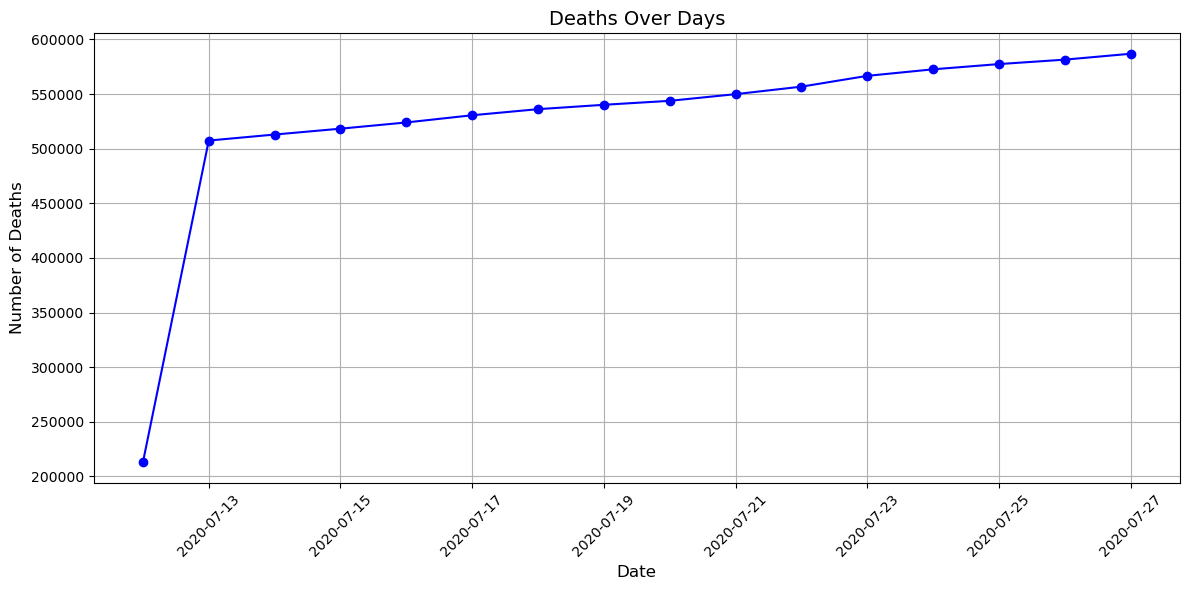

In [233]:
# Ensure Date is in datetime format with dayfirst=True to handle day/month/year format
merged_data['Date'] = pd.to_datetime(merged_data['Date'], dayfirst=True, errors='coerce')

# 1. Plot the daily deaths globally over time (Distribution over time)
daily_deaths = merged_data.groupby('Date')['Deaths'].sum()

# Debug: Check if there is any data to plot
if daily_deaths.empty:
    print("No data to plot")
else:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(daily_deaths.index, daily_deaths.values, marker='o', linestyle='-', color='b')
    
    plt.title('Deaths Over Days', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Deaths', fontsize=12)
    plt.xticks(rotation=45)  # Rotate date labels for better visibility
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### From the above plot : 
#### The minimum number of deaths is 200,000 on 2020-07-12.
#### The maximum number of deaths is 580,000 on 2020-07-27.
#### We can observe from this plot that the number of deaths increases over time

### Research Question 2:  Which countries/regions have the highest total number of COVID-19 deaths?

Top Countries/Regions by Total Deaths:
Country/Region
US        2260792
Brazil    1209900
Mexico     598655
Italy      525803
Spain      454736
France     452298
India      426011
Peru       230500
Iran       216570
Russia     198016
Name: Deaths, dtype: int64


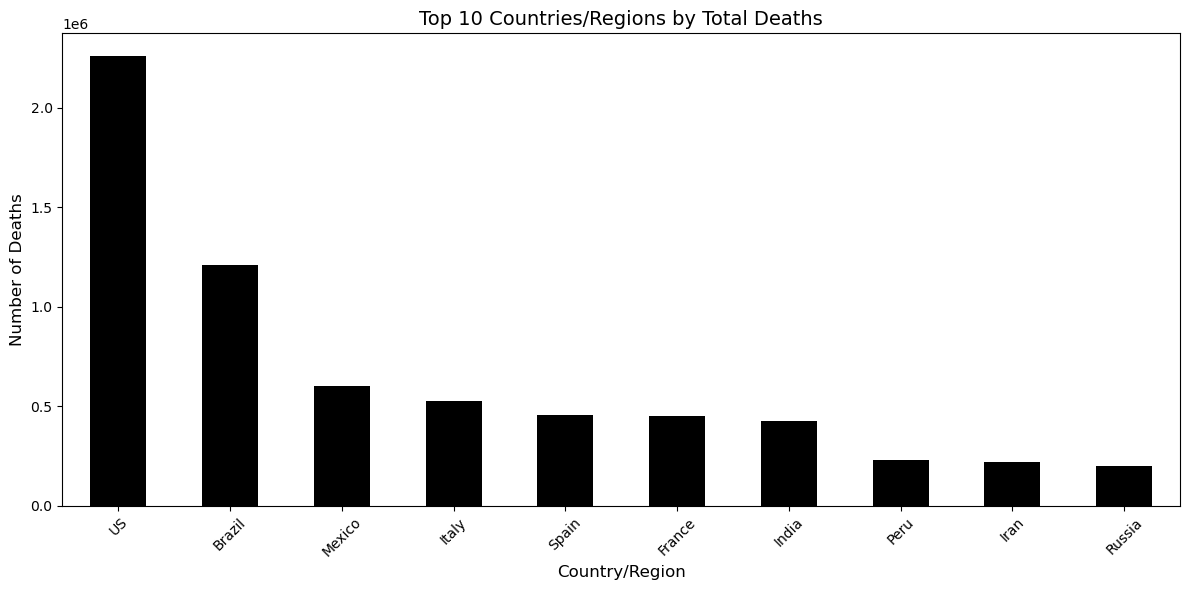

In [251]:
# 1. Calculate the total deaths by country/region
deaths_by_country = merged_data.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False)

# 2. Display the top countries/regions with the highest total deaths
print("Top Countries/Regions by Total Deaths:")
print(deaths_by_country.head(10))  # Display top 10 countries/regions

# 3. Plot the distribution of deaths by country/region
plt.figure(figsize=(12, 6))
deaths_by_country.head(10).plot(kind='bar', color='black')
plt.title('Top 10 Countries/Regions by Total Deaths', fontsize=14)
plt.xlabel('Country/Region', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### From the above plot:
##### we noticed that the US has the highest number of COVID-19 deaths with 2.26 million deaths.
##### while Russia has the lowest with 198 thousand deaths.

### Research Question 3: Global Distribution of Deaths, Recovered, and Active Cases

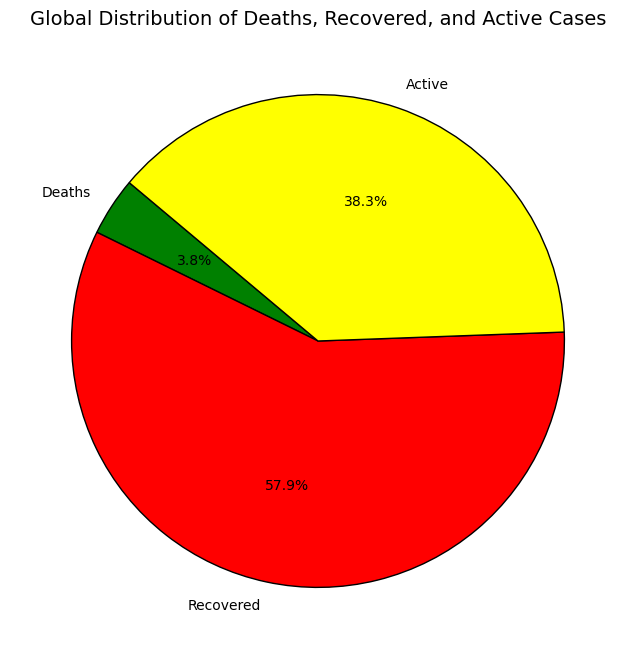

In [292]:
# Ensure Date is in datetime format with dayfirst=True to handle day/month/year format
merged_data['Date'] = pd.to_datetime(merged_data['Date'], dayfirst=True, errors='coerce')

# Sum the deaths, recovered, and active cases across all countries
total_deaths = merged_data['Deaths'].sum()
total_recovered = merged_data['Recovered'].sum()
total_active = merged_data['Active'].sum()

# Data for the pie chart
labels = ['Deaths', 'Recovered', 'Active']
sizes = [total_deaths, total_recovered, total_active]
colors = ['green', 'red', 'yellow']  # Color for each section of the pie chart

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and display
plt.title('Global Distribution of Deaths, Recovered, and Active Cases', fontsize=14)
plt.show()

#### From pie chart : 
#### 1- Recovered : 57.9%
#### 2- Death : 3.8 %
#### 3- Active : 38.3 


### Research Question 4: What is the distribution of COVID-19 deaths in Egypt?

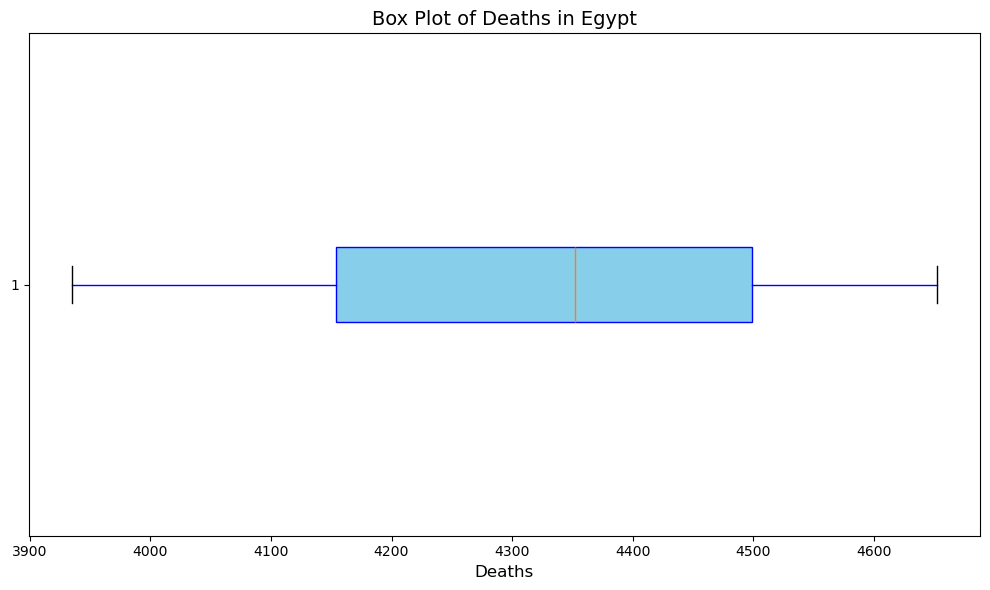

In [296]:
# Filter data for Egypt
egypt_data = merged_data[merged_data['Country/Region'] == 'Egypt']

# Create a box plot for 'Deaths' in Egypt
plt.figure(figsize=(10, 6))

# Box plot for the 'Deaths' column in Egypt data
plt.boxplot(egypt_data['Deaths'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'), 
            whiskerprops=dict(color='blue'), flierprops=dict(markerfacecolor='red', marker='o'))

# Title and labels
plt.title('Box Plot of Deaths in Egypt', fontsize=14)
plt.xlabel('Deaths', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

#### The box plot summarizes the distribution of deaths in Egypt:

##### 1- Median: The central value of deaths.

##### 2- Interquartile Range (IQR): The middle 50% of data lies within the box, showing where most deaths are concentrated.

##### 3- Range: Deaths range approximately from 3,900 to 4,700.

##### 4- Symmetry: The data appears fairly symmetric with no significant skewness.

##### 5- Outliers: No extreme outliers are present.


### Research Question 5: What is the distribution of COVID-19 deaths globally?

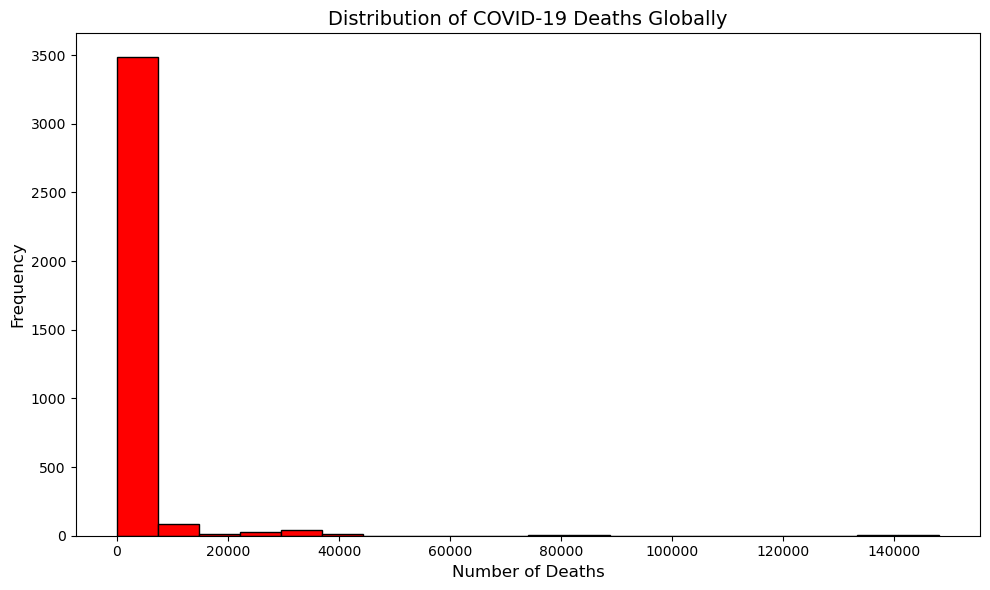

In [308]:
# Create a histogram for the 'Deaths' column in the entire dataset
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(merged_data['Deaths'], bins=20, color='red', edgecolor='black')

# Title and labels
plt.title('Distribution of COVID-19 Deaths Globally', fontsize=14)
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


#### From Histogram : 
##### The histogram shows that most countries have a low number of COVID-19 deaths
##### while a few countries have very high death counts, leading to an imbalanced distribution.

### Research Question 6 : What is the relationship between the number of confirmed cases and the number of deaths across countries?

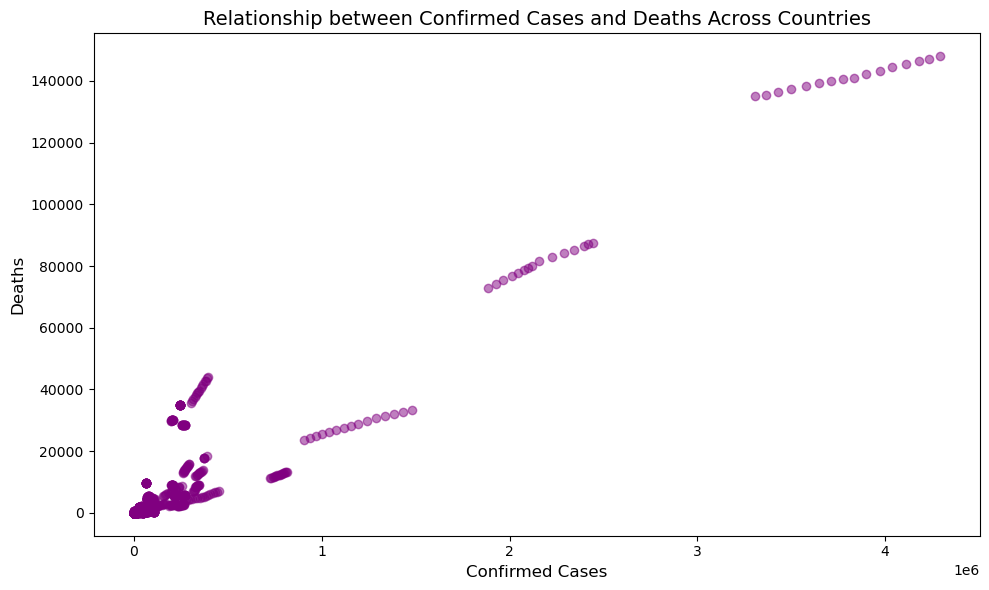

In [311]:
# 1. Scatter plot for relationship between Confirmed cases and Deaths
plt.figure(figsize=(10, 6))

# Plot the scatter plot
plt.scatter(merged_data['Confirmed'], merged_data['Deaths'], color='purple', alpha=0.5)

# Title and labels
plt.title('Relationship between Confirmed Cases and Deaths Across Countries', fontsize=14)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Deaths', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


#### Key Insights : 
#### 1. Positive correlation: Confirmed COVID-19 cases and deaths are directly related.
#### 2. Country clusters: Similar case and death rates group countries together.
#### 3. Outliers: Countries with exceptionally high cases (>4M) and deaths (>140K) stand out.
#### 4. Concentrated data: Most countries have relatively low cases and deaths.
#### 5.Confirmed COVID-19 cases strongly correlate with deaths, varying across countries.

### Research Question 7: What is the correlation between different COVID-19 variables (Confirmed, Deaths, Recovered, and Active cases) across countries?

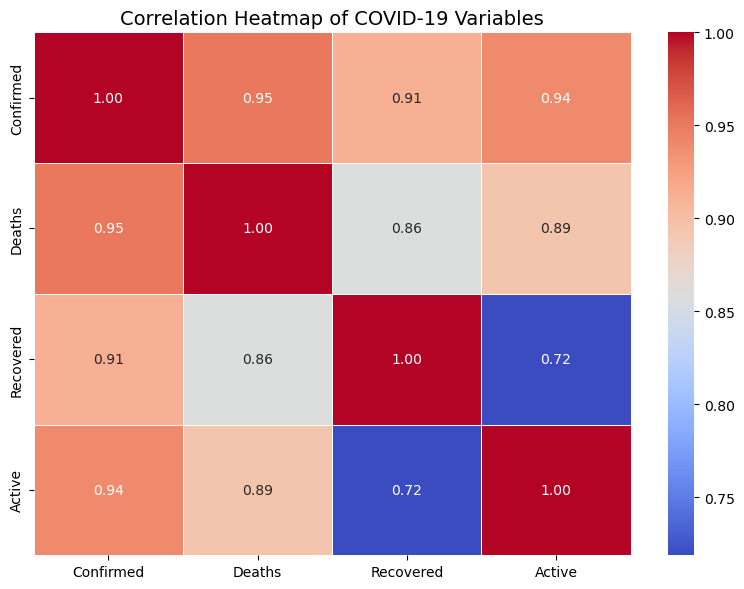

In [324]:
# 1. Calculate the correlation matrix for the relevant columns
correlation_matrix = merged_data[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()

# 2. Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and display the plot
plt.title('Correlation Heatmap of COVID-19 Variables', fontsize=14)
plt.tight_layout()
plt.show()


#### - Key Insights
#### 1. Confirmed Cases vs. Deaths: 0.95 (strong positive)
#### 2. Confirmed Cases vs. Recovered: 0.91 (strong positive)
#### 3. Confirmed Cases vs. Active: 0.94 (strong positive)
#### 4. Deaths vs. Recovered: 0.86 (moderate positive)
#### 5. Deaths vs. Active: 0.89 (strong positive)
#### 6. Recovered vs. Active: 0.72 (weak positive)

#### - Summary
#### 1. Confirmed cases drive other outcomes.
#### 2. Strong correlations between confirmed cases, deaths, and active cases.
#### 3. Weaker correlation between recovered and active cases.
#### 4. Policymakers should focus on reducing active cases and boosting recovery efforts.

### Feature selection 
#### From the previous heatmap :
##### we should focus on variables that have a strong relationship with the target variable (the one we want to predict). For predicting "Deaths":
##### We should use "Confirmed" cases because it has a strong correlation of 0.95 with "Deaths."

### Machine Learning algorithm and Evlauation

['Panama' 'Papua New Guinea' 'Paraguay' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Qatar' 'Romania' 'Russia' 'Rwanda' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'San Marino' 'Saudi Arabia' 'Senegal'
 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia' 'Somalia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Switzerland'
 'Taiwan*' 'Tanzania' 'Thailand' 'Togo' 'Trinidad and Tobago' 'Tunisia'
 'Turkey' 'Uganda' 'Ukraine' 'United Arab Emirates' 'United Kingdom'
 'Uruguay' 'US' 'Uzbekistan' 'Venezuela' 'Vietnam' 'Zambia' 'Zimbabwe'
 'Dominica' 'Grenada' 'Belize' 'Laos' 'Libya' 'West Bank and Gaza'
 'Guinea-Bissau' 'Mali' 'Saint Kitts and Nevis' 'Kosovo' 'Burma'
 'Botswana' 'Burundi' 'Sierra Leone' 'Malawi' 'France' 'South Sudan'
 'Western Sahara' 'Sao Tome and Principe' 'Yemen' 'Comoros' 'Tajikistan'
 'Lesotho' 'Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangla

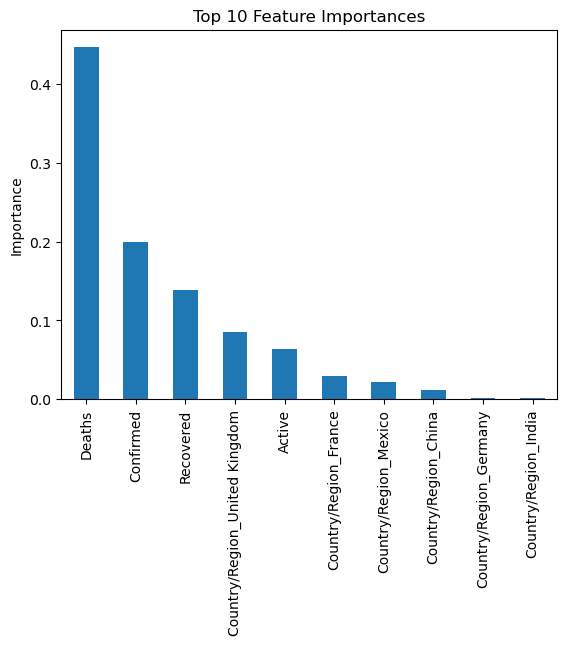

   Country/Region  Predicted Death Percentage
0       Australia                    2.896350
1          Brazil                    0.966574
2           China                    2.166803
3          France                    3.018575
4         Germany                    5.442305
5           India                    0.354535
6          Mexico                    2.638261
7  United Kingdom                    2.190607


In [334]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
merged_data = pd.read_csv(r'D:\Data Science\merged_with_death_percentage.csv')  # Adjust this path

# Check available countries in the dataset
print(merged_data['Country/Region'].unique())

# Select the countries you want to focus on (make sure these match exactly with the dataset)
countries_of_interest = ['United States', 'Canada', 'Mexico', 'Germany', 'France', 'India', 'China', 'Brazil', 'Australia', 'United Kingdom']

# Filter the data to include only the selected countries
filtered_data = merged_data[merged_data['Country/Region'].isin(countries_of_interest)]

# Check if the filtered data has rows
print(filtered_data.shape)  # Should not be empty

# If the data is fine, proceed with the rest of the steps
if filtered_data.shape[0] > 0:
    # Select features and target
    X = filtered_data.drop(['Death Percentage', 'Date'], axis=1)
    y = filtered_data['Death Percentage']

    # Save the original 'Country/Region' column to use later for predictions
    country_names = filtered_data['Country/Region'].values

    # Encode categorical variables (e.g., Country/Region)
    X = pd.get_dummies(X, columns=['Country/Region'], drop_first=True)

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest Regressor
    rf = RandomForestRegressor(random_state=42, n_estimators=500)
    rf.fit(X_train, y_train)

    # Make predictions
    predictions = rf.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    accuracy = sum(abs(y_test - predictions) / y_test <= 0.1) / len(y_test)

    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print(f"Accuracy within 10%: {accuracy * 100:.2f}%")

    # Feature importance analysis
    feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\nFeature Importances:")
    print(feature_importances)

    # Visualize top 10 feature importances
    feature_importances.head(10).plot(kind='bar', title='Top 10 Feature Importances')
    plt.ylabel('Importance')
    plt.show()

    # Map the predictions back to the original countries
    # Create a DataFrame with country names and their corresponding predictions
    test_country_names = filtered_data.iloc[X_train.shape[0]:]['Country/Region'].values  # get country names for the test set

    # Create a DataFrame for the predictions
    country_predictions = pd.DataFrame({'Country/Region': test_country_names, 'Predicted Death Percentage': predictions})

    # Group by country and calculate the mean prediction for each country
    country_predictions_avg = country_predictions.groupby('Country/Region').mean().reset_index()

    print(country_predictions_avg)
else:
    print("No data for the selected countries.")


## Conclusion

#### in this project, we analyzed the global impact of COVID-19 by focusing on key variables such as confirmed cases, deaths, recovered cases, and active cases. We performed various data wrangling steps to clean the dataset and prepare it for analysis. Through visualizations like box plots, scatter plots, and heatmaps, we explored relationships between different variables and identified trends.
#### Key insights include:
#### Global Death Distribution: The death counts vary greatly between countries, with some nations experiencing significantly higher death tolls.
#### Feature Selection: We identified that variables like "Confirmed cases" have a strong correlation with "Deaths," making them important predictors.
#### Trends Over Time: The data also reveals important trends over time, showing how COVID-19 deaths have increased globally.

#### Overall, this analysis helps understand the spread and impact of COVID-19, which can inform decisions related to healthcare, policy, and future responses to similar pandemics.